In [ ]:
# To simulate realistic CPU scheduling scenarios, we generated processes using both random and uniform distributions. 
# By this we give to users 2 options to make the project more user-friendly. 
# This approach ensures diversity and fairness in process characteristics for evaluating scheduling algorithms.


# Demonstration with Uniform Distribution Process Generation  

Enter number of processes (max 10): 3
Select process generation type:
1. Random
2. Uniform
Enter choice: 2

--- FCFS ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P1      0         5       0       5       5           5           0         
P2      2         5       5       10      10          8           3         
P3      4         5       10      15      15          11          6         

Average Waiting Time: 3.00
Average Turnaround Time: 8.00
Average Response Time: 3.00
Waiting Time Variance Deviation: 2.45


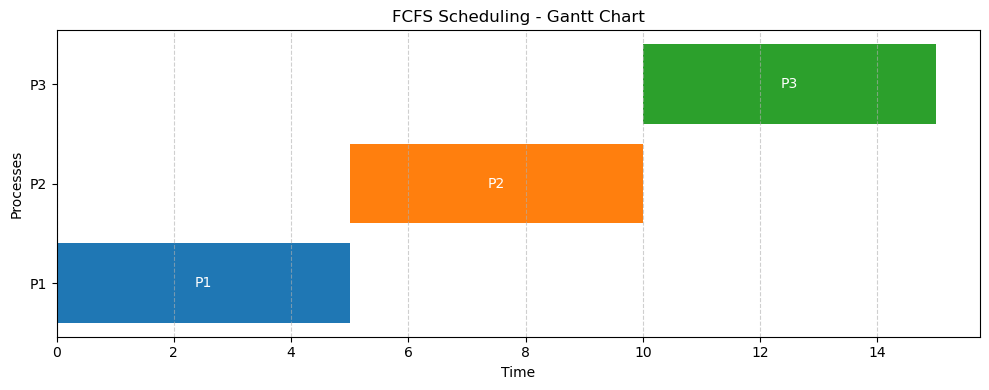

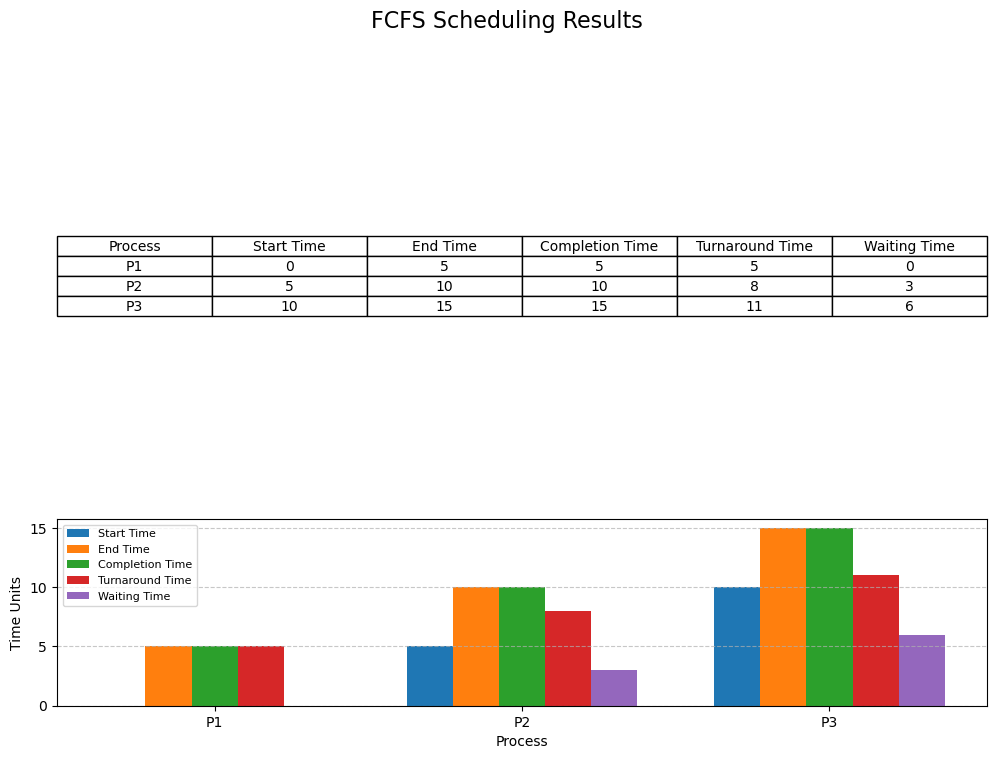


--- SJF (Non-preemptive) ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P1      0         5       0       5       5           5           0         
P2      2         5       5       10      10          8           3         
P3      4         5       10      15      15          11          6         

Average Waiting Time: 3.00
Average Turnaround Time: 8.00
Average Response Time: 3.00
Waiting Time Variance Deviation: 2.45


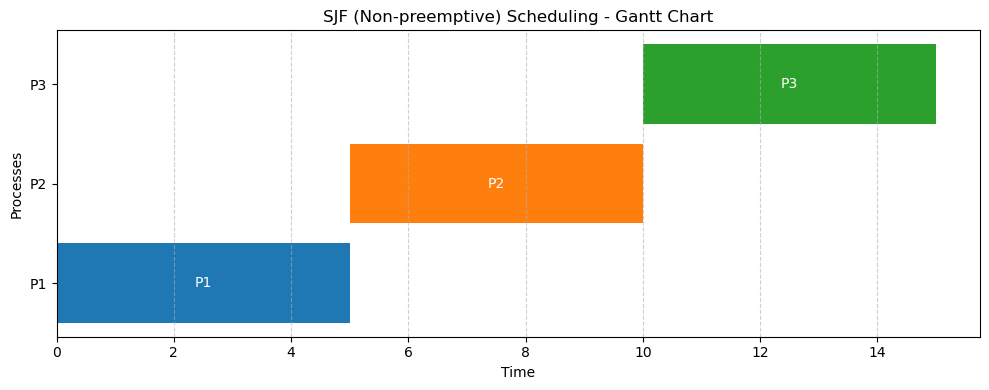

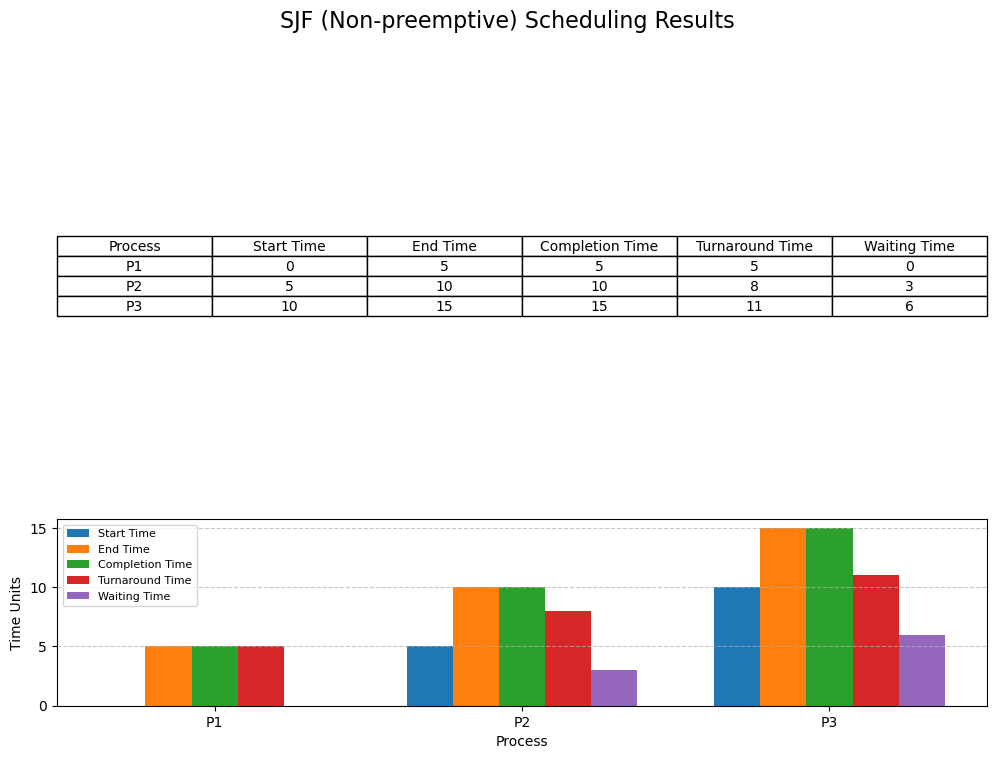


--- Priority Scheduling (Non-preemptive) ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P1      0         5       0       5       5           5           0         
P2      2         5       5       10      10          8           3         
P3      4         5       10      15      15          11          6         

Average Waiting Time: 3.00
Average Turnaround Time: 8.00
Average Response Time: 3.00
Waiting Time Variance Deviation: 2.45


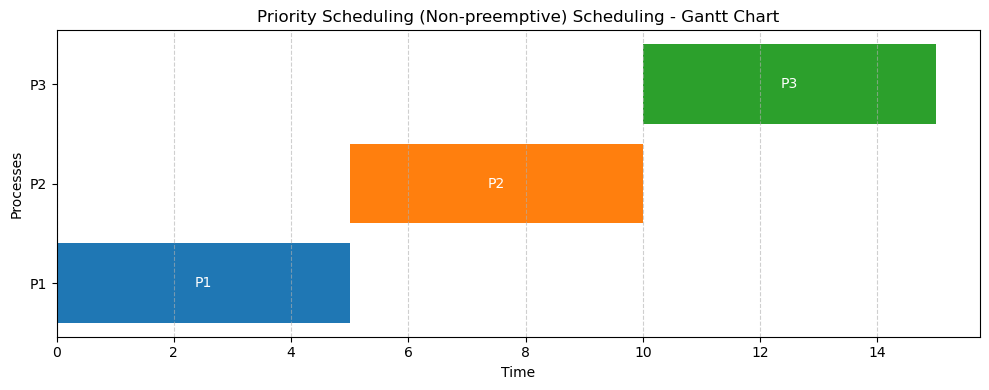

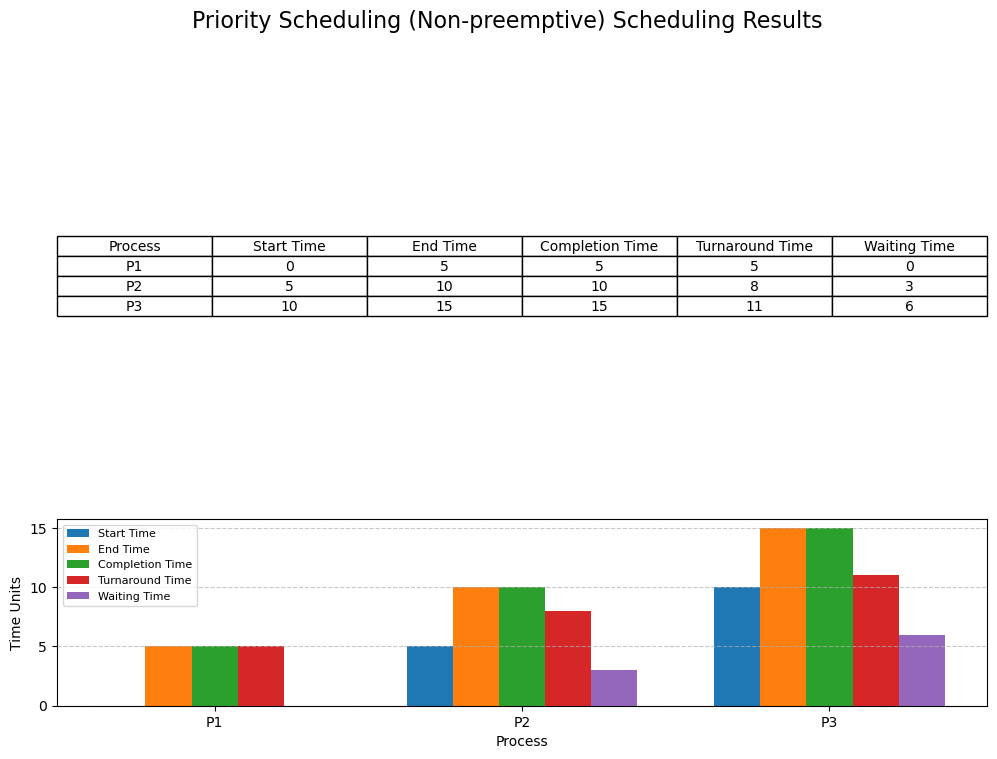


--- Round Robin (Quantum = 4) ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P1      0         5       0       13      13          13          8         
P2      2         5       4       14      14          12          7         
P3      4         5       8       15      15          11          6         

Average Waiting Time: 7.00
Average Turnaround Time: 12.00
Average Response Time: 2.00
Waiting Time Variance Deviation: 0.82


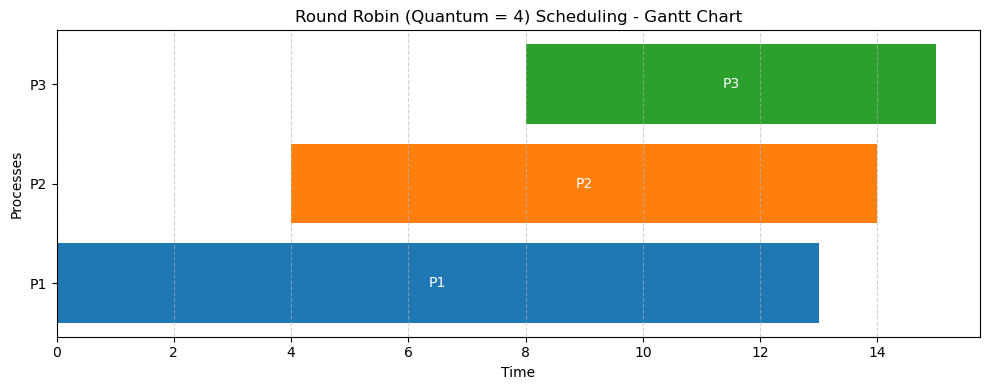

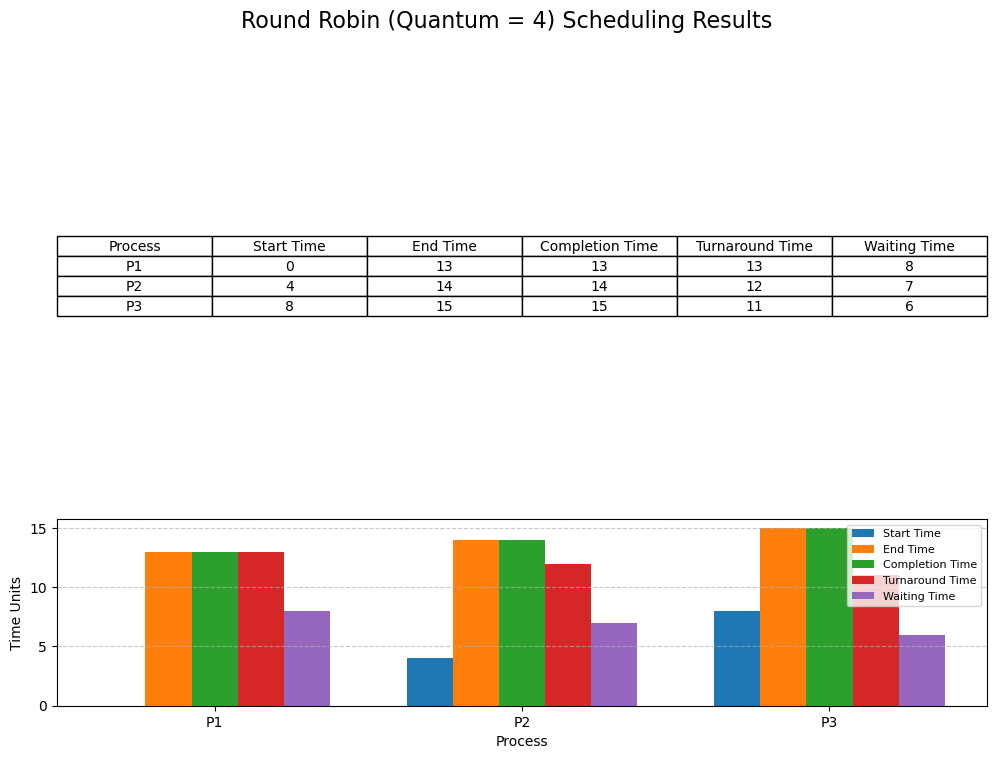

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

MAX_PROCESSES = 10


class Process:
    def __init__(self, pid, arrival, burst, priority):
        self.pid = pid
        self.arrival = arrival
        self.burst = burst
        self.priority = priority
        self.start = 0
        self.end = 0
        self.completion = 0
        self.turnaround = 0
        self.waiting = 0
        self.first_response = -1


def compare_arrival(process):
    return process.arrival


def generate_processes(n, is_uniform):
    processes = []
    for i in range(n):
        pid = i + 1
        arrival = i * 2 if is_uniform else random.randint(0, 9)
        burst = 5 if is_uniform else random.randint(1, 9)
        priority = i + 1 if is_uniform else random.randint(1, 10)
        processes.append(Process(pid, arrival, burst, priority))
    return processes



def print_processes(processes, algorithm_name):
    print(f"\n--- {algorithm_name} ---")
    print(f"{'Process':<8}{'Arrival':<10}{'Burst':<8}{'Start':<8}{'End':<8}{'Completion':<12}{'Turnaround':<12}{'Waiting':<10}")
    for p in processes:
        print(
            f"P{p.pid:<7}{p.arrival:<10}{p.burst:<8}{p.start:<8}{p.end:<8}{p.completion:<12}{p.turnaround:<12}{p.waiting:<10}"
        )



def calculate_avg_times(processes):
    total_waiting = 0
    total_turnaround = 0
    total_response = 0
    for p in processes:
        total_waiting += p.waiting
        total_turnaround += p.turnaround
        total_response += p.first_response - p.arrival

    mean_waiting = total_waiting / len(processes)
    wt_variance = np.sqrt(sum([(p.waiting - mean_waiting) ** 2 for p in processes]) / len(processes))

    print(f"\nAverage Waiting Time: {mean_waiting:.2f}")
    print(f"Average Turnaround Time: {total_turnaround / len(processes):.2f}")
    print(f"Average Response Time: {total_response / len(processes):.2f}")
    print(f"Waiting Time Variance Deviation: {wt_variance:.2f}")



def visualize_gantt_chart(processes, algorithm_name):
    plt.figure(figsize=(10, 4))
    plt.title(f"{algorithm_name} Scheduling - Gantt Chart")
    plt.xlabel("Time")
    plt.ylabel("Processes")

    # Define colors for processes
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    process_colors = {}
    for i, process in enumerate(processes):
        process_colors[process.pid] = colors[i % len(colors)]  # Use modulo to handle more than 10 processes

    for process in processes:
        plt.barh(y=f"P{process.pid}",  # Use process ID as the y-label
                 left=process.start,
                 width=process.end - process.start,
                 color=process_colors[process.pid],
                 label=f"P{process.pid}")
        # Display process ID in the middle of the bar
        plt.text(x=process.start + (process.end - process.start) / 2,
                 y=f"P{process.pid}",
                 s=f"P{process.pid}",
                 ha='center',
                 va='center',
                 color='white')

    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()



def visualize_table_with_bars(processes, algorithm_name):
    # Data for the table
    process_ids = [f"P{p.pid}" for p in processes]
    start_times = [p.start for p in processes]
    end_times = [p.end for p in processes]
    completion_times = [p.completion for p in processes]
    turnaround_times = [p.turnaround for p in processes]
    waiting_times = [p.waiting for p in processes]

    # Create the figure and axes for the table
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 0.5]})  # Adjust figure and subplot sizes
    fig.suptitle(f"{algorithm_name} Scheduling Results", fontsize=16) # Add a title for the whole figure


    # Table header
    table_data = [
        ["Process", "Start Time", "End Time", "Completion Time", "Turnaround Time", "Waiting Time"],
        *zip(process_ids, start_times, end_times, completion_times, turnaround_times, waiting_times),
    ]

    # Create the table
    table = ax[0].table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size as needed
    table.scale(1, 1.2)  # Adjust table size
    ax[0].axis('off')
    ax[0].axis('tight')


    # Add a second plot for the bar charts
    # ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.3])  # [left, bottom, width, height] adjust as necessary
    ax2 = ax[1]
    bar_width = 0.15
    index = np.arange(len(process_ids))

    # Define colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    # Create bars for each metric.
    bar1 = ax2.bar(index - 2 * bar_width, start_times, bar_width, color=colors[0], label='Start Time')
    bar2 = ax2.bar(index - bar_width, end_times, bar_width, color=colors[1], label='End Time')
    bar3 = ax2.bar(index, completion_times, bar_width, color=colors[2], label='Completion Time')
    bar4 = ax2.bar(index + bar_width, turnaround_times, bar_width, color=colors[3], label='Turnaround Time')
    bar5 = ax2.bar(index + 2 * bar_width, waiting_times, bar_width, color=colors[4], label='Waiting Time')

    ax2.set_xlabel('Process')
    ax2.set_ylabel('Time Units')
    ax2.set_xticks(index)
    ax2.set_xticklabels(process_ids)
    ax2.legend(fontsize = 8) #adjust legend fontsize
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    #fig.tight_layout() # causes problems with title overlapping
    plt.show()



def fcfs(processes):
    processes.sort(key=compare_arrival)
    time = 0
    for i, process in enumerate(processes):
        if time < process.arrival:
            time = process.arrival
        process.start = time
        process.first_response = time
        time += process.burst
        process.end = time
        process.completion = time
        process.turnaround = process.completion - process.arrival
        process.waiting = process.turnaround - process.burst
    print_processes(processes, "FCFS")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, "FCFS")
    visualize_table_with_bars(processes, "FCFS")



def sjf(processes):
    processes.sort(key=compare_arrival)
    time = 0
    count = 0
    completed_flags = [0] * len(processes)

    while count < len(processes):
        idx = -1
        min_burst = float('inf')
        for i, process in enumerate(processes):
            if not completed_flags[i] and process.arrival <= time and process.burst < min_burst:
                min_burst = process.burst
                idx = i
        if idx == -1:
            time += 1
            continue
        processes[idx].start = time
        processes[idx].first_response = time
        time += processes[idx].burst
        processes[idx].end = time
        processes[idx].completion = time
        processes[idx].turnaround = time - processes[idx].arrival
        processes[idx].waiting = processes[idx].turnaround - processes[idx].burst
        completed_flags[idx] = 1
        count += 1

    print_processes(processes, "SJF (Non-preemptive)")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, "SJF (Non-preemptive)")
    visualize_table_with_bars(processes, "SJF (Non-preemptive)")



def priority_scheduling(processes):
    processes.sort(key=compare_arrival)
    time = 0
    count = 0
    completed_flags = [0] * len(processes)

    while count < len(processes):
        idx = -1
        highest_priority = float('inf')
        for i, process in enumerate(processes):
            if (
                not completed_flags[i]
                and process.arrival <= time
                and process.priority < highest_priority
            ):
                highest_priority = process.priority
                idx = i
        if idx == -1:
            time += 1
            continue
        processes[idx].start = time
        processes[idx].first_response = time
        time += processes[idx].burst
        processes[idx].end = time
        processes[idx].completion = time
        processes[idx].turnaround = processes[idx].completion - processes[idx].arrival
        processes[idx].waiting = processes[idx].turnaround - processes[idx].burst
        completed_flags[idx] = 1
        count += 1

    print_processes(processes, "Priority Scheduling (Non-preemptive)")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, "Priority Scheduling (Non-preemptive)")
    visualize_table_with_bars(processes, "Priority Scheduling (Non-preemptive)")



def round_robin(processes, quantum):
    rem_burst = [p.burst for p in processes]
    time = 0
    complete = 0
    done = [0] * len(processes)

    for p in processes:
        p.first_response = -1

    while complete < len(processes):
        executed = 0
        for i, process in enumerate(processes):
            if process.arrival <= time and rem_burst[i] > 0:
                if process.first_response == -1:
                    process.first_response = time
                exec_time = min(rem_burst[i], quantum)
                time += exec_time
                rem_burst[i] -= exec_time

                if rem_burst[i] == 0 and not done[i]:
                    process.completion = time
                    process.turnaround = process.completion - process.arrival
                    process.waiting = process.turnaround - process.burst
                    process.start = process.first_response
                    process.end = process.completion
                    complete += 1
                    done[i] = 1
                executed = 1
        if not executed:
            time += 1

    print_processes(processes, f"Round Robin (Quantum = {quantum})")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, f"Round Robin (Quantum = {quantum})")
    visualize_table_with_bars(processes, f"Round Robin (Quantum = {quantum})")



def main():
    random.seed(42)  # For consistent results
    n = int(input(f"Enter number of processes (max {MAX_PROCESSES}): "))
    if n <= 0 or n > MAX_PROCESSES:
        print("Invalid number of processes.")
        return

    dist_type = int(input("Select process generation type:\n1. Random\n2. Uniform\nEnter choice: "))
    if dist_type not in [1, 2]:
        print("Invalid distribution type selected.")
        return

    processes = generate_processes(n, dist_type == 2)

    # Make copies for each algorithm
    copy1 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]
    copy2 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]
    copy3 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]
    copy4 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]

    fcfs(copy1)
    sjf(copy2)
    priority_scheduling(copy3)
    round_robin(copy4, 4)



if __name__ == "__main__":
    main()


# Demonstration with Random Distribution Process Generation 


Enter number of processes (max 10): 5
Select process generation type:
1. Random
2. Uniform
Enter choice: 1

--- FCFS ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P5      0         2       0       2       2           2           0         
P1      1         1       2       3       3           2           1         
P3      1         9       3       12      12          11          2         
P2      3         4       12      16      16          13          9         
P4      9         7       16      23      23          14          7         

Average Waiting Time: 3.80
Average Turnaround Time: 8.40
Average Response Time: 3.80
Waiting Time Variance Deviation: 3.54


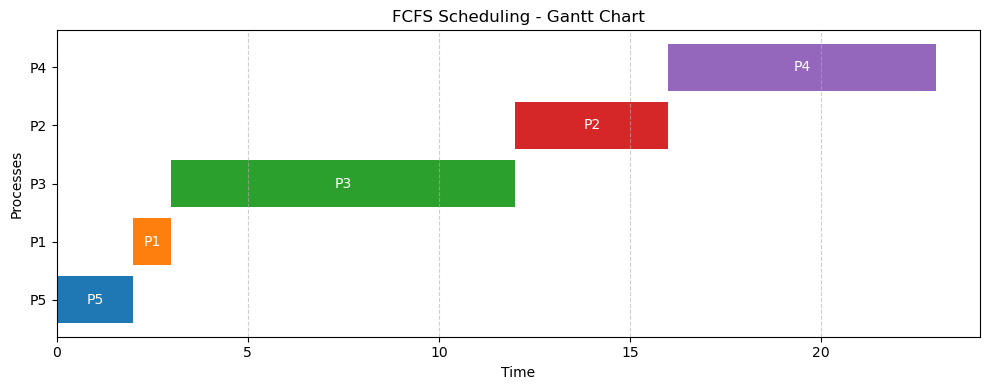

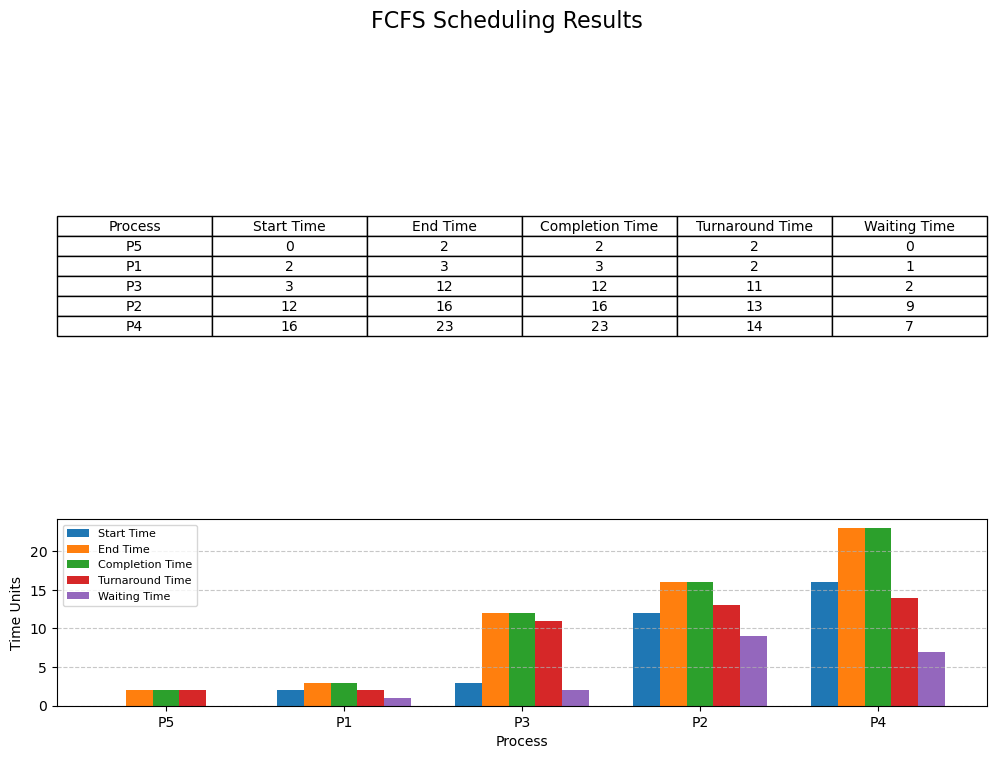


--- SJF (Non-preemptive) ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P5      0         2       0       2       2           2           0         
P1      1         1       2       3       3           2           1         
P3      1         9       7       16      16          15          6         
P2      3         4       3       7       7           4           0         
P4      9         7       16      23      23          14          7         

Average Waiting Time: 2.80
Average Turnaround Time: 7.40
Average Response Time: 2.80
Waiting Time Variance Deviation: 3.06


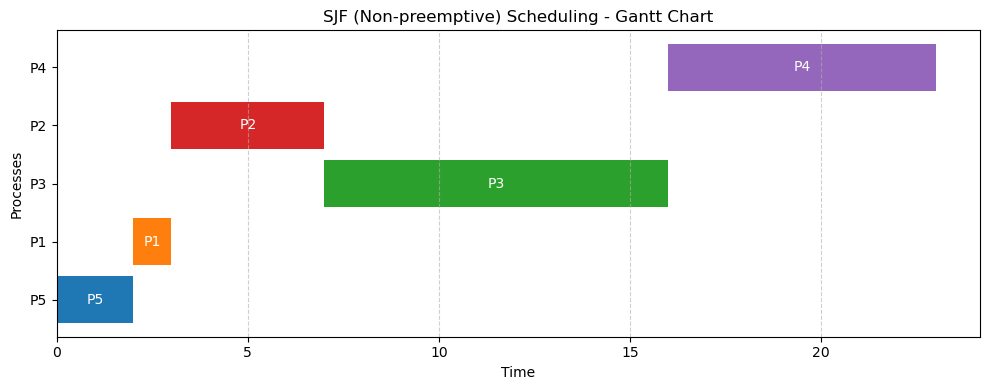

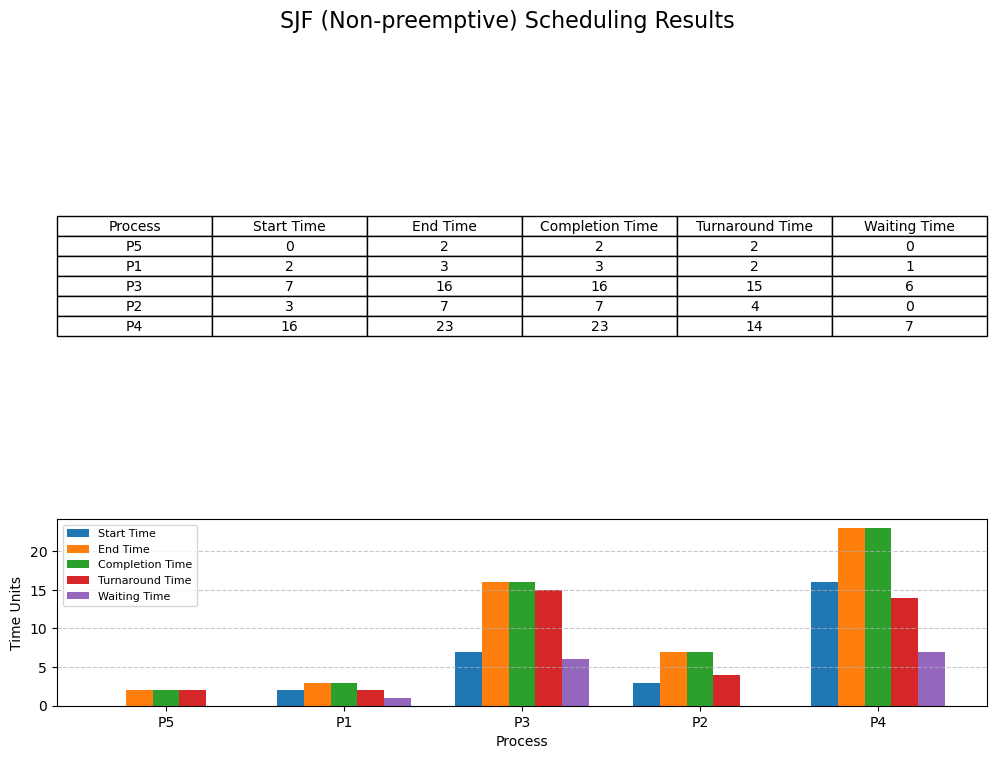


--- Priority Scheduling (Non-preemptive) ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P5      0         2       0       2       2           2           0         
P1      1         1       22      23      23          22          21        
P3      1         9       2       11      11          10          1         
P2      3         4       18      22      22          19          15        
P4      9         7       11      18      18          9           2         

Average Waiting Time: 7.80
Average Turnaround Time: 12.40
Average Response Time: 7.80
Waiting Time Variance Deviation: 8.57


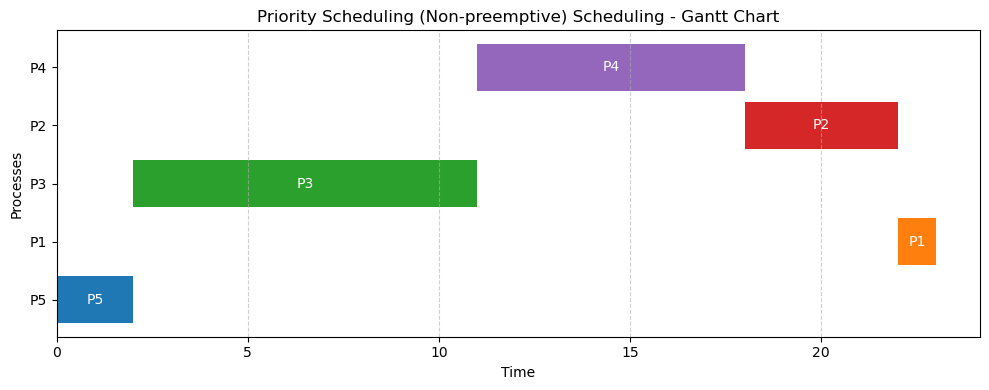

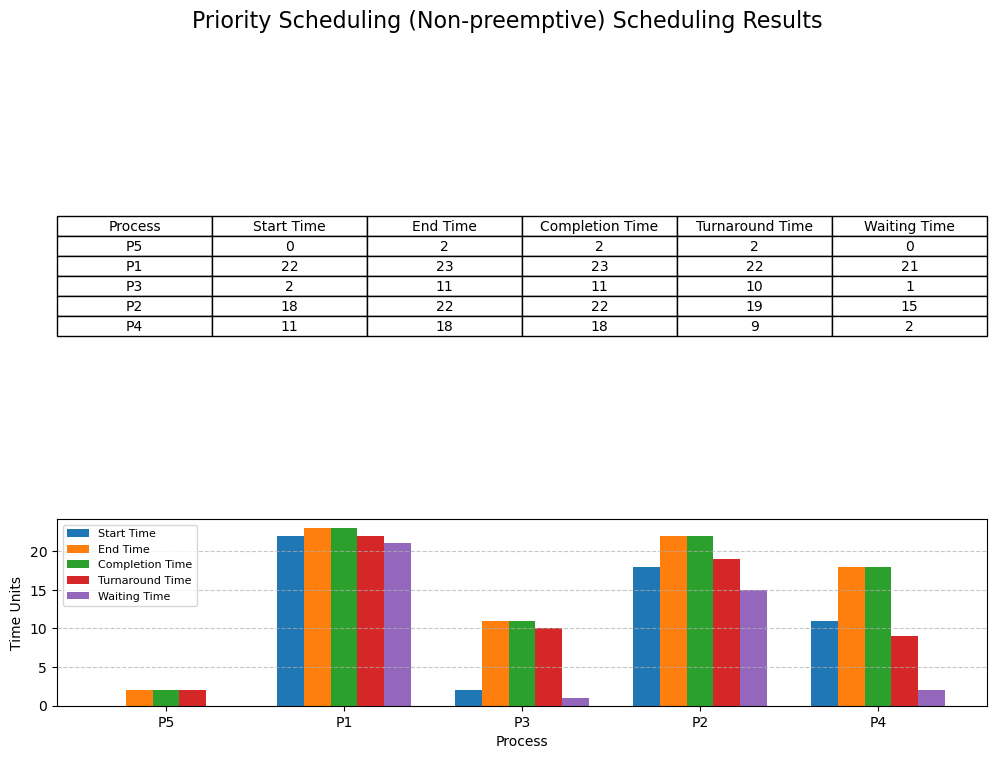


--- Round Robin (Quantum = 4) ---
Process Arrival   Burst   Start   End     Completion  Turnaround  Waiting   
P1      1         1       2       3       3           2           1         
P2      3         4       3       7       7           4           0         
P3      1         9       7       23      23          22          13        
P4      9         7       11      22      22          13          6         
P5      0         2       0       2       2           2           0         

Average Waiting Time: 4.00
Average Turnaround Time: 8.60
Average Response Time: 1.80
Waiting Time Variance Deviation: 5.02


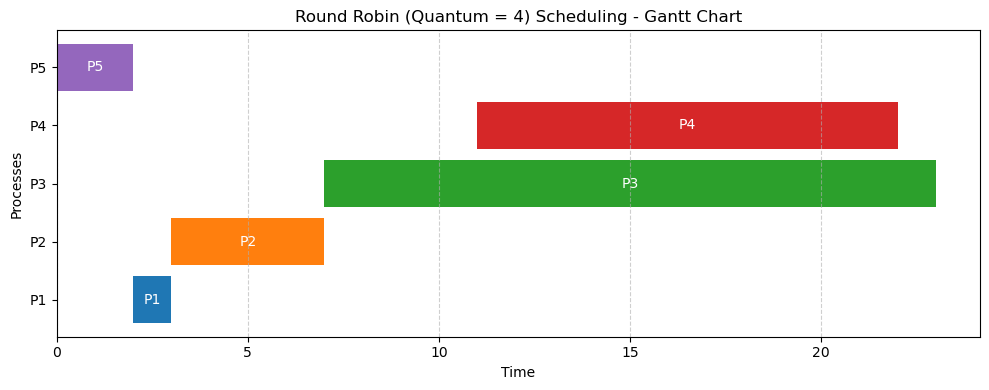

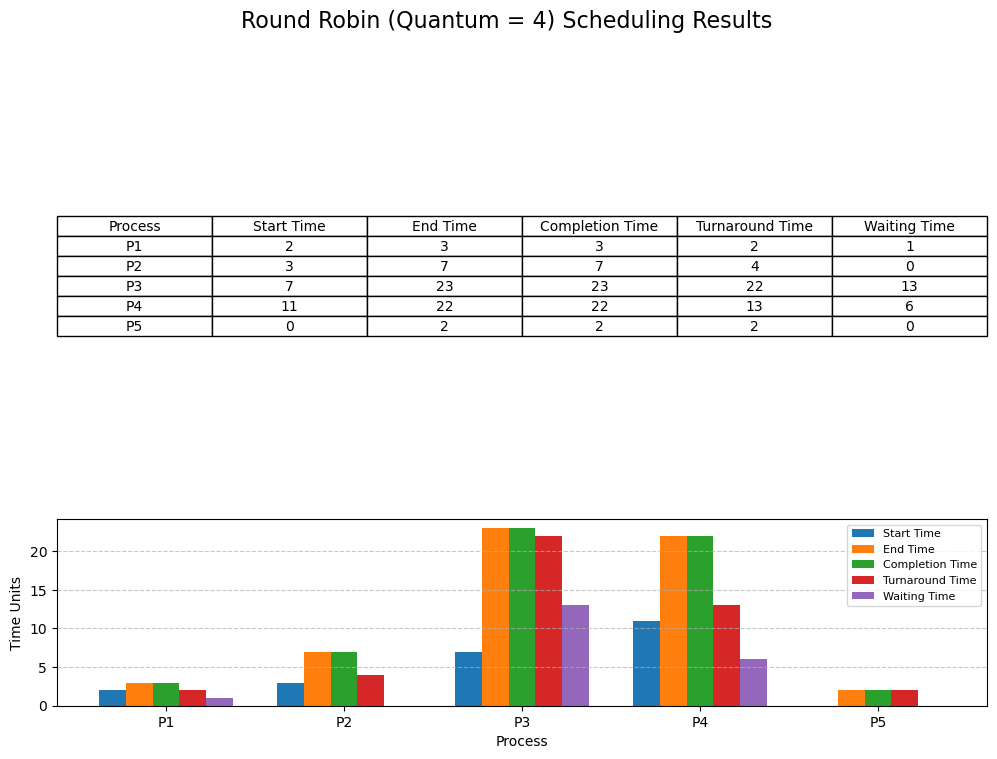

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

MAX_PROCESSES = 10


class Process:
    def __init__(self, pid, arrival, burst, priority):
        self.pid = pid
        self.arrival = arrival
        self.burst = burst
        self.priority = priority
        self.start = 0
        self.end = 0
        self.completion = 0
        self.turnaround = 0
        self.waiting = 0
        self.first_response = -1


def compare_arrival(process):
    return process.arrival


def generate_processes(n, is_uniform):
    processes = []
    for i in range(n):
        pid = i + 1
        arrival = i * 2 if is_uniform else random.randint(0, 9)
        burst = 5 if is_uniform else random.randint(1, 9)
        priority = i + 1 if is_uniform else random.randint(1, 10)
        processes.append(Process(pid, arrival, burst, priority))
    return processes



def print_processes(processes, algorithm_name):
    print(f"\n--- {algorithm_name} ---")
    print(f"{'Process':<8}{'Arrival':<10}{'Burst':<8}{'Start':<8}{'End':<8}{'Completion':<12}{'Turnaround':<12}{'Waiting':<10}")
    for p in processes:
        print(
            f"P{p.pid:<7}{p.arrival:<10}{p.burst:<8}{p.start:<8}{p.end:<8}{p.completion:<12}{p.turnaround:<12}{p.waiting:<10}"
        )



def calculate_avg_times(processes):
    total_waiting = 0
    total_turnaround = 0
    total_response = 0
    for p in processes:
        total_waiting += p.waiting
        total_turnaround += p.turnaround
        total_response += p.first_response - p.arrival

    mean_waiting = total_waiting / len(processes)
    wt_variance = np.sqrt(sum([(p.waiting - mean_waiting) ** 2 for p in processes]) / len(processes))

    print(f"\nAverage Waiting Time: {mean_waiting:.2f}")
    print(f"Average Turnaround Time: {total_turnaround / len(processes):.2f}")
    print(f"Average Response Time: {total_response / len(processes):.2f}")
    print(f"Waiting Time Variance Deviation: {wt_variance:.2f}")



def visualize_gantt_chart(processes, algorithm_name):
    plt.figure(figsize=(10, 4))
    plt.title(f"{algorithm_name} Scheduling - Gantt Chart")
    plt.xlabel("Time")
    plt.ylabel("Processes")

    # Define colors for processes
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    process_colors = {}
    for i, process in enumerate(processes):
        process_colors[process.pid] = colors[i % len(colors)]  # Use modulo to handle more than 10 processes

    for process in processes:
        plt.barh(y=f"P{process.pid}",  # Use process ID as the y-label
                 left=process.start,
                 width=process.end - process.start,
                 color=process_colors[process.pid],
                 label=f"P{process.pid}")
        # Display process ID in the middle of the bar
        plt.text(x=process.start + (process.end - process.start) / 2,
                 y=f"P{process.pid}",
                 s=f"P{process.pid}",
                 ha='center',
                 va='center',
                 color='white')

    plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()



def visualize_table_with_bars(processes, algorithm_name):
    # Data for the table
    process_ids = [f"P{p.pid}" for p in processes]
    start_times = [p.start for p in processes]
    end_times = [p.end for p in processes]
    completion_times = [p.completion for p in processes]
    turnaround_times = [p.turnaround for p in processes]
    waiting_times = [p.waiting for p in processes]

    # Create the figure and axes for the table
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 0.5]})  # Adjust figure and subplot sizes
    fig.suptitle(f"{algorithm_name} Scheduling Results", fontsize=16) # Add a title for the whole figure


    # Table header
    table_data = [
        ["Process", "Start Time", "End Time", "Completion Time", "Turnaround Time", "Waiting Time"],
        *zip(process_ids, start_times, end_times, completion_times, turnaround_times, waiting_times),
    ]

    # Create the table
    table = ax[0].table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Adjust font size as needed
    table.scale(1, 1.2)  # Adjust table size
    ax[0].axis('off')
    ax[0].axis('tight')


    # Add a second plot for the bar charts
    # ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.3])  # [left, bottom, width, height] adjust as necessary
    ax2 = ax[1]
    bar_width = 0.15
    index = np.arange(len(process_ids))

    # Define colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    # Create bars for each metric.
    bar1 = ax2.bar(index - 2 * bar_width, start_times, bar_width, color=colors[0], label='Start Time')
    bar2 = ax2.bar(index - bar_width, end_times, bar_width, color=colors[1], label='End Time')
    bar3 = ax2.bar(index, completion_times, bar_width, color=colors[2], label='Completion Time')
    bar4 = ax2.bar(index + bar_width, turnaround_times, bar_width, color=colors[3], label='Turnaround Time')
    bar5 = ax2.bar(index + 2 * bar_width, waiting_times, bar_width, color=colors[4], label='Waiting Time')

    ax2.set_xlabel('Process')
    ax2.set_ylabel('Time Units')
    ax2.set_xticks(index)
    ax2.set_xticklabels(process_ids)
    ax2.legend(fontsize = 8) #adjust legend fontsize
    ax2.grid(axis='y', linestyle='--', alpha=0.7)
    #fig.tight_layout() # causes problems with title overlapping
    plt.show()



def fcfs(processes):
    processes.sort(key=compare_arrival)
    time = 0
    for i, process in enumerate(processes):
        if time < process.arrival:
            time = process.arrival
        process.start = time
        process.first_response = time
        time += process.burst
        process.end = time
        process.completion = time
        process.turnaround = process.completion - process.arrival
        process.waiting = process.turnaround - process.burst
    print_processes(processes, "FCFS")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, "FCFS")
    visualize_table_with_bars(processes, "FCFS")



def sjf(processes):
    processes.sort(key=compare_arrival)
    time = 0
    count = 0
    completed_flags = [0] * len(processes)

    while count < len(processes):
        idx = -1
        min_burst = float('inf')
        for i, process in enumerate(processes):
            if not completed_flags[i] and process.arrival <= time and process.burst < min_burst:
                min_burst = process.burst
                idx = i
        if idx == -1:
            time += 1
            continue
        processes[idx].start = time
        processes[idx].first_response = time
        time += processes[idx].burst
        processes[idx].end = time
        processes[idx].completion = time
        processes[idx].turnaround = time - processes[idx].arrival
        processes[idx].waiting = processes[idx].turnaround - processes[idx].burst
        completed_flags[idx] = 1
        count += 1

    print_processes(processes, "SJF (Non-preemptive)")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, "SJF (Non-preemptive)")
    visualize_table_with_bars(processes, "SJF (Non-preemptive)")



def priority_scheduling(processes):
    processes.sort(key=compare_arrival)
    time = 0
    count = 0
    completed_flags = [0] * len(processes)

    while count < len(processes):
        idx = -1
        highest_priority = float('inf')
        for i, process in enumerate(processes):
            if (
                not completed_flags[i]
                and process.arrival <= time
                and process.priority < highest_priority
            ):
                highest_priority = process.priority
                idx = i
        if idx == -1:
            time += 1
            continue
        processes[idx].start = time
        processes[idx].first_response = time
        time += processes[idx].burst
        processes[idx].end = time
        processes[idx].completion = time
        processes[idx].turnaround = processes[idx].completion - processes[idx].arrival
        processes[idx].waiting = processes[idx].turnaround - processes[idx].burst
        completed_flags[idx] = 1
        count += 1

    print_processes(processes, "Priority Scheduling (Non-preemptive)")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, "Priority Scheduling (Non-preemptive)")
    visualize_table_with_bars(processes, "Priority Scheduling (Non-preemptive)")



def round_robin(processes, quantum):
    rem_burst = [p.burst for p in processes]
    time = 0
    complete = 0
    done = [0] * len(processes)

    for p in processes:
        p.first_response = -1

    while complete < len(processes):
        executed = 0
        for i, process in enumerate(processes):
            if process.arrival <= time and rem_burst[i] > 0:
                if process.first_response == -1:
                    process.first_response = time
                exec_time = min(rem_burst[i], quantum)
                time += exec_time
                rem_burst[i] -= exec_time

                if rem_burst[i] == 0 and not done[i]:
                    process.completion = time
                    process.turnaround = process.completion - process.arrival
                    process.waiting = process.turnaround - process.burst
                    process.start = process.first_response
                    process.end = process.completion
                    complete += 1
                    done[i] = 1
                executed = 1
        if not executed:
            time += 1

    print_processes(processes, f"Round Robin (Quantum = {quantum})")
    calculate_avg_times(processes)
    visualize_gantt_chart(processes, f"Round Robin (Quantum = {quantum})")
    visualize_table_with_bars(processes, f"Round Robin (Quantum = {quantum})")



def main():
    random.seed(42)  # For consistent results
    n = int(input(f"Enter number of processes (max {MAX_PROCESSES}): "))
    if n <= 0 or n > MAX_PROCESSES:
        print("Invalid number of processes.")
        return

    dist_type = int(input("Select process generation type:\n1. Random\n2. Uniform\nEnter choice: "))
    if dist_type not in [1, 2]:
        print("Invalid distribution type selected.")
        return

    processes = generate_processes(n, dist_type == 2)

    # Make copies for each algorithm
    copy1 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]
    copy2 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]
    copy3 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]
    copy4 = [Process(p.pid, p.arrival, p.burst, p.priority) for p in processes]

    fcfs(copy1)
    sjf(copy2)
    priority_scheduling(copy3)
    round_robin(copy4, 4)



if __name__ == "__main__":
    main()
